# Question 2  All Loans

This notebook aim is twfold:

(1) Explore the data in the simple case of a single loan

(2) Perform the operation required by Question 2 (below) in the case of a single loan. This allows us to get clarity and check that the operations are correct in a simpler context. This will also help us for scaling, since once we have entire portfolio we can divide the work in individual task (one per-loan).


**Question 2**

Please add the following calculated columns to the dataframe (plus any others you found helpful). 

Dynamic Columns (These vary by loan and by calendar month):

- current_balance: The current balance outstanding for each loan and month.
- seasoning: The integer number of months since the loan was originated at each month.
- n_missed_payments: number of missed payments in a row.
- prepaid_in_month: a flag indicating that the borrower prepaid in a given month.
- default_in_month: a flag indicating that the borrower defaulted in a given month.
- recovery_in_month: a flag indicating that a recovery has been made post-default in a given month.
- is_recovery_payment: a flag indicating whether the associated payment has been made post-default.
- time_to_reversion: The integer number of months until the laon reverts. This is negative if the - loan is before reversion and 0 at the month of reversion.
- is_post_seller_purchsae_date: Is this time period after the seller purchased this loan.

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../case')




In [2]:
from portfolio_model import Loans_Portfolio

In [2]:
mystyle = '../style/pastel-light.mplstyle'
plt.style.use(mystyle)
%config InlineBackend.figure_format='retina'
pd.options.mode.copy_on_write = True 
pd.options.display.float_format = "{:,.2f}".format

In [3]:
cob = datetime.date(2022, 12, 31)  # 31/12/2022
ss_path = '../data/2024_Strat_Casestudy.xlsx'
portfolio = Loans_Portfolio(cob_date=cob, data_path=ss_path)

In [4]:
pd.options.display.float_format = "{:,.2f}".format
pd.options.mode.copy_on_write = True

In [5]:
portfolio.consolidate_data()
df = portfolio.data

In [6]:
df.head()

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,pre_reversion_fixed_rate,post_reversion_boe_margin
0,1,2020-12-31,"150,876.00",NaN,NaN,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04


In [7]:
df['Payment_Made'] = df['Payment_Made'].fillna(0)
df['Payment_Due'] = df['Payment_Due'].fillna(0)

In [8]:
df['current_balance'] = df['Balance'] - df['Payment_Due']  + df['Payment_Made']
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,pre_reversion_fixed_rate,post_reversion_boe_margin,current_balance
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00"
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00"
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00"
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00"
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,1630,2022-08-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,0.05,0.02,"81,951.00"
42607,1630,2022-09-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,0.05,0.02,"81,951.00"
42608,1630,2022-10-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,0.05,0.02,"81,951.00"
42609,1630,2022-11-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,0.05,0.02,"81,951.00"


In [9]:
df['level_1'] - df['origination_date']  # This give us days

0         0 days
1        31 days
2        59 days
3        90 days
4       120 days
          ...   
42606    92 days
42607   122 days
42608   153 days
42609   183 days
42610   214 days
Length: 42611, dtype: timedelta64[ns]

In [10]:
df['seasoning'] = df['level_1'].dt.to_period('M').astype(int) - df['origination_date'].dt.to_period('M').astype(int)

Question/Assumption

- I am going to assume that a payment which is not zero but less than the amount due is a missed payment.
- There is only 1 instance this happens.


In [11]:
df['missed_payment'] = df['Payment_Due'] > df['Payment_Made']

In [12]:
df['not_missed'] = ~df['missed_payment']

In [13]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,pre_reversion_fixed_rate,post_reversion_boe_margin,current_balance,seasoning,missed_payment,not_missed
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00",0,False,True
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00",1,False,True
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00",2,False,True
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00",3,False,True
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,0.02,0.04,"150,876.00",4,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,1630,2022-08-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,0.05,0.02,"81,951.00",3,False,True
42607,1630,2022-09-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,0.05,0.02,"81,951.00",4,False,True
42608,1630,2022-10-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,0.05,0.02,"81,951.00",5,False,True
42609,1630,2022-11-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,0.05,0.02,"81,951.00",6,False,True


In [14]:
df[['loan_id', 'missed_payment', 'not_missed']]

,loan_id,missed_payment,not_missed
0,1,False,True
1,1,False,True
2,1,False,True
3,1,False,True
4,1,False,True
...,...,...,...
42606,1630,False,True
42607,1630,False,True
42608,1630,False,True
42609,1630,False,True


In [15]:
df['n_missed_payments'] = df.groupby(['loan_id', 'not_missed'])['missed_payment'].cumsum()

- prepaid_in_month: a flag indicating that the borrower prepaid in a given month.

Prepayment: The full and early prepayment of a mortgage.

In [16]:

df['prepaid_in_month'] = (df['Payment_Due'] < df['Payment_Made']) & (df['Balance'] == 0)

- default_in_month: a flag indicating that the borrower defaulted in a given month.
- Default: The borrower misses three payments in a row. Borrowers cannot be cured from defaults.

In [17]:
df[['loan_id', 'n_missed_payments']]

,loan_id,n_missed_payments
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
42606,1630,0
42607,1630,0
42608,1630,0
42609,1630,0


In [18]:
df['default_in_month'] = (df.n_missed_payments == 3)

In [19]:
df['defaulted'] = df.groupby(by=['loan_id'])['default_in_month'].cumsum()

- recovery_in_month: a flag indicating that a recovery has been made post-default in a given month.

- Recovery: Any payments made post being flagged as default.

In [20]:
df['recovery_in_month'] = (df.defaulted) * (df.Payment_Made)

In [21]:
df.head()

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,post_reversion_boe_margin,current_balance,seasoning,missed_payment,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted,recovery_in_month
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.04,"150,876.00",0,False,True,0,False,False,0,0.00
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.04,"150,876.00",1,False,True,0,False,False,0,0.00
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.04,"150,876.00",2,False,True,0,False,False,0,0.00
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.04,"150,876.00",3,False,True,0,False,False,0,0.00
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.04,"150,876.00",4,False,True,0,False,False,0,0.00


In [22]:
df['recovery_cumsum'] = df.groupby(['loan_id'])['recovery_in_month'].cumsum()

In [23]:
df['is_recovery_payment'] = (df.defaulted ==True) & (df.Payment_Made > 0)

In [24]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,seasoning,missed_payment,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted,recovery_in_month,recovery_cumsum,is_recovery_payment
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0,False,True,0,False,False,0,0.00,0.00,False
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,1,False,True,0,False,False,0,0.00,0.00,False
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,2,False,True,0,False,False,0,0.00,0.00,False
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,3,False,True,0,False,False,0,0.00,0.00,False
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,4,False,True,0,False,False,0,0.00,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,1630,2022-08-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,3,False,True,0,False,False,0,0.00,0.00,False
42607,1630,2022-09-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,4,False,True,0,False,False,0,0.00,0.00,False
42608,1630,2022-10-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,5,False,True,0,False,False,0,0.00,0.00,False
42609,1630,2022-11-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,6,False,True,0,False,False,0,0.00,0.00,False


- time_to_reversion: The integer number of months until the loan reverts. 
- This is negative if the - loan is before reversion and 0 at the month of reversion.

In [25]:
df['time_to_reversion'] = df['level_1'].dt.to_period('M').astype(int) - df['reversion_date'].dt.to_period('M').astype(int)

- is_post_seller_purchsae_date: Is this time period after the seller purchased this loan.

In [26]:
df[['level_1', 'investor_1_acquisition_date']]

,level_1,investor_1_acquisition_date
0,2020-12-31,2020-12-31
1,2021-01-31,2020-12-31
2,2021-02-28,2020-12-31
3,2021-03-31,2020-12-31
4,2021-04-30,2020-12-31
...,...,...
42606,2022-08-31,2022-05-31
42607,2022-09-30,2022-05-31
42608,2022-10-31,2022-05-31
42609,2022-11-30,2022-05-31


In [27]:
df['is_post_seller_purchsae_date'] = (df['level_1'] > df['investor_1_acquisition_date'])
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,not_missed,n_missed_payments,prepaid_in_month,default_in_month,defaulted,recovery_in_month,recovery_cumsum,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,...,True,0,False,False,0,0.00,0.00,False,-24,False
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,True,0,False,False,0,0.00,0.00,False,-23,True
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,True,0,False,False,0,0.00,0.00,False,-22,True
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,True,0,False,False,0,0.00,0.00,False,-21,True
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,True,0,False,False,0,0.00,0.00,False,-20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,1630,2022-08-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,True,0,False,False,0,0.00,0.00,False,-21,True
42607,1630,2022-09-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,True,0,False,False,0,0.00,0.00,False,-20,True
42608,1630,2022-10-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,True,0,False,False,0,0.00,0.00,False,-19,True
42609,1630,2022-11-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,True,0,False,False,0,0.00,0.00,False,-18,True


In [28]:
import matplotlib.pyplot as plt

In [29]:
df.current_balance

0       150,876.00
1       150,876.00
2       150,876.00
3       150,876.00
4       150,876.00
           ...    
42606    81,951.00
42607    81,951.00
42608    81,951.00
42609    81,951.00
42610    81,951.00
Name: current_balance, Length: 42611, dtype: float64

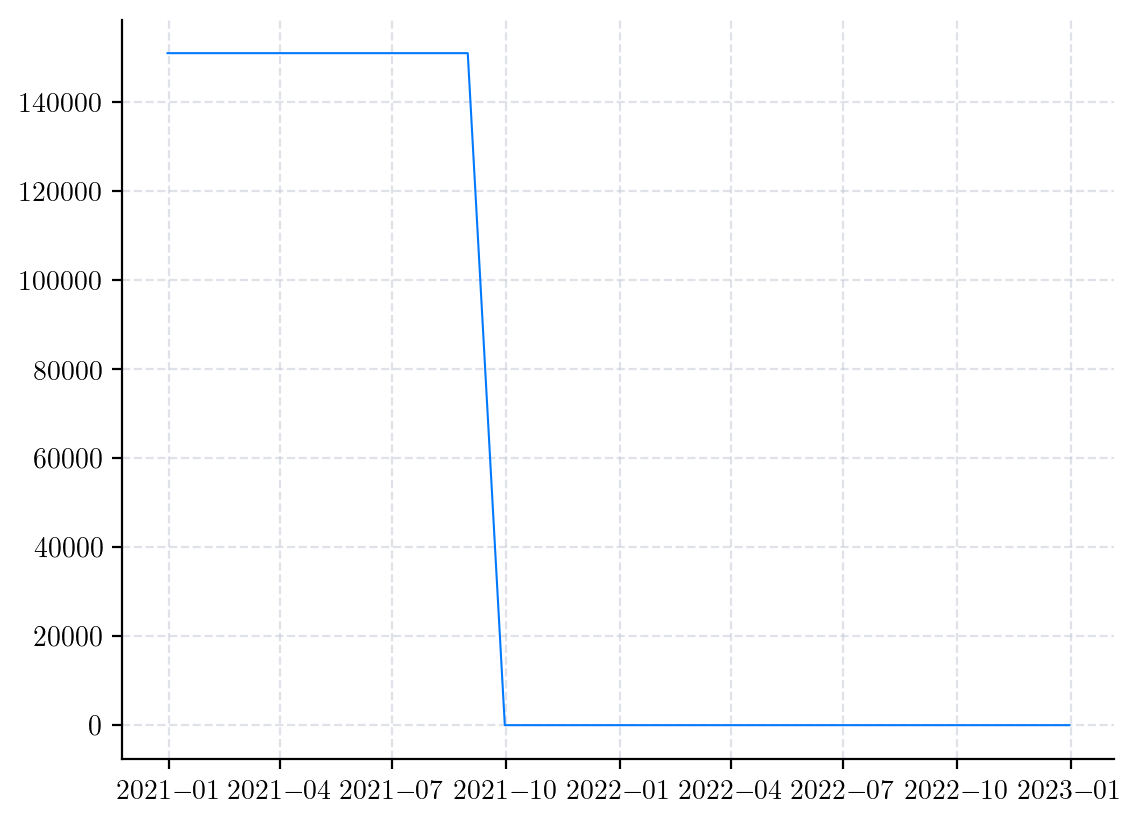

In [30]:
plt.plot(df[df.loan_id == 1].level_1, df[df.loan_id == 1].current_balance)
plt.show()

In [31]:
df[df.loan_id == 1]['current_balance']

0    150,876.00
1    150,876.00
2    150,876.00
3    150,876.00
4    150,876.00
5    150,876.00
6    150,876.00
7    150,876.00
8    150,876.00
9          0.00
10         0.00
11         0.00
12         0.00
13         0.00
14         0.00
15         0.00
16         0.00
17         0.00
18         0.00
19         0.00
20         0.00
21         0.00
22         0.00
23         0.00
24         0.00
Name: current_balance, dtype: float64

In [32]:
df[df['loan_id']==1][['Balance', 'Payment_Made', 'Payment_Due' ,'original_balance', 'current_balance']]

,Balance,Payment_Made,Payment_Due,original_balance,current_balance
0,"150,876.00",0.00,0.00,150876,"150,876.00"
1,"150,876.00",249.96,249.96,150876,"150,876.00"
2,"150,876.00",249.96,249.96,150876,"150,876.00"
3,"150,876.00",249.96,249.96,150876,"150,876.00"
4,"150,876.00",249.96,249.96,150876,"150,876.00"
5,"150,876.00",249.96,249.96,150876,"150,876.00"
6,"150,876.00",249.96,249.96,150876,"150,876.00"
7,"150,876.00",249.96,249.96,150876,"150,876.00"
8,0.00,"151,125.96",249.96,150876,"150,876.00"
9,0.00,0.00,0.00,150876,0.00


## Static Columns 

These vary by loan but are the same for each calendar month:

- postdefault_recoveries: The cumulative recoveries post-default.
- prepayment_date: The date that the loan prepays (or nan if it does not).
- date_of_default: the date that the loan defaults (or nan if it does not).
- date_of_recovery: the date that a recovery is made on the loan, post-default.
- exposure_at_default: the current balance of the loan outstanding at default.
- recovery_percent: the postdefault_recoveries as a percentage of the exposure at default.

In [33]:
df[['level_1', 'recovery_in_month']]

,level_1,recovery_in_month
0,2020-12-31,0.00
1,2021-01-31,0.00
2,2021-02-28,0.00
3,2021-03-31,0.00
4,2021-04-30,0.00
...,...,...
42606,2022-08-31,0.00
42607,2022-09-30,0.00
42608,2022-10-31,0.00
42609,2022-11-30,0.00


In [34]:
pd.DataFrame( {'post_default_recoveries':  df.groupby(['loan_id'])['recovery_in_month'].sum()} ).reset_index()

,loan_id,post_default_recoveries
0,1,0.00
1,2,0.00
2,3,"88,870.54"
3,4,0.00
4,5,0.00
...,...,...
1625,1626,0.00
1626,1627,0.00
1627,1628,0.00
1628,1629,0.00


In [35]:
df = df.merge(pd.DataFrame({'post_default_recoveries':  df.groupby(['loan_id'])['recovery_in_month'].sum()} ).reset_index(), left_on='loan_id', right_on='loan_id')

- prepayment_date: The date that the loan prepays (or nan if it does not).

In [36]:
df[['level_1', 'prepaid_in_month']]

,level_1,prepaid_in_month
0,2020-12-31,False
1,2021-01-31,False
2,2021-02-28,False
3,2021-03-31,False
4,2021-04-30,False
...,...,...
42606,2022-08-31,False
42607,2022-09-30,False
42608,2022-10-31,False
42609,2022-11-30,False


In [37]:
df[df.prepaid_in_month == True][['loan_id','level_1']].rename(columns={'level_1':'prepayment_date'}).reset_index(drop=True)

,loan_id,prepayment_date
0,1,2021-08-31
1,3,2022-07-31
2,7,2022-11-30
3,10,2021-10-31
4,13,2021-05-31
...,...,...
325,1567,2021-12-31
326,1594,2021-08-31
327,1606,2022-12-31
328,1614,2022-09-30


In [38]:
x = df[['loan_id' ,'level_1', 'prepaid_in_month']]
y = df[df.prepaid_in_month == True][['loan_id', 'level_1']].rename(columns={'level_1':'prepayment_date'}).reset_index(drop=True)

In [39]:
x.merge(y, left_on='loan_id', right_on='loan_id', how='left')

,loan_id,level_1,prepaid_in_month,prepayment_date
0,1,2020-12-31,False,2021-08-31
1,1,2021-01-31,False,2021-08-31
2,1,2021-02-28,False,2021-08-31
3,1,2021-03-31,False,2021-08-31
4,1,2021-04-30,False,2021-08-31
...,...,...,...,...
42606,1630,2022-08-31,False,NaT
42607,1630,2022-09-30,False,NaT
42608,1630,2022-10-31,False,NaT
42609,1630,2022-11-30,False,NaT


In [40]:
df = df.merge(df[df.prepaid_in_month == True][['loan_id', 'level_1']].rename(columns={'level_1':'prepayment_date'}).reset_index(drop=True), left_on='loan_id', right_on='loan_id', how='left')

In [41]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,prepaid_in_month,default_in_month,defaulted,recovery_in_month,recovery_cumsum,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,post_default_recoveries,prepayment_date
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,False,0,0.00,0.00,False,-24,False,0.00,2021-08-31
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,False,0,0.00,0.00,False,-23,True,0.00,2021-08-31
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,False,0,0.00,0.00,False,-22,True,0.00,2021-08-31
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,False,0,0.00,0.00,False,-21,True,0.00,2021-08-31
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,False,0,0.00,0.00,False,-20,True,0.00,2021-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,1630,2022-08-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,False,False,0,0.00,0.00,False,-21,True,0.00,NaT
42607,1630,2022-09-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,False,False,0,0.00,0.00,False,-20,True,0.00,NaT
42608,1630,2022-10-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,False,False,0,0.00,0.00,False,-19,True,0.00,NaT
42609,1630,2022-11-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,False,False,0,0.00,0.00,False,-18,True,0.00,NaT


TODO: IS THIS A PREPAYMENT IF DEFAULTED?

- date_of_default: the date that the loan defaults (or nan if it does not).

In [42]:
df[['level_1','Payment_Due' ,'Payment_Made', 'current_balance' ,'default_in_month', 'defaulted',  'Balance']]

,level_1,Payment_Due,Payment_Made,current_balance,default_in_month,defaulted,Balance
0,2020-12-31,0.00,0.00,"150,876.00",False,0,"150,876.00"
1,2021-01-31,249.96,249.96,"150,876.00",False,0,"150,876.00"
2,2021-02-28,249.96,249.96,"150,876.00",False,0,"150,876.00"
3,2021-03-31,249.96,249.96,"150,876.00",False,0,"150,876.00"
4,2021-04-30,249.96,249.96,"150,876.00",False,0,"150,876.00"
...,...,...,...,...,...,...,...
42606,2022-08-31,325.20,325.20,"81,951.00",False,0,"81,951.00"
42607,2022-09-30,325.20,325.20,"81,951.00",False,0,"81,951.00"
42608,2022-10-31,325.20,325.20,"81,951.00",False,0,"81,951.00"
42609,2022-11-30,325.20,325.20,"81,951.00",False,0,"81,951.00"


In [43]:
df[df.default_in_month == True][['loan_id', 'level_1']].rename(
    columns={'level_1': 'date_of_default'}).reset_index(drop=True)['loan_id']

0        3
1       38
2       52
3       89
4       92
      ... 
60    1430
61    1433
62    1560
63    1567
64    1606
Name: loan_id, Length: 65, dtype: int64

In [44]:
df = df.merge(df[df.default_in_month == True][['loan_id', 'level_1']].rename(columns={'level_1': 'date_of_default'}).reset_index(drop=True), left_on='loan_id', right_on='loan_id', how='left')

In [45]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,default_in_month,defaulted,recovery_in_month,recovery_cumsum,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,post_default_recoveries,prepayment_date,date_of_default
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,0,0.00,0.00,False,-24,False,0.00,2021-08-31,NaT
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,0,0.00,0.00,False,-23,True,0.00,2021-08-31,NaT
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,0,0.00,0.00,False,-22,True,0.00,2021-08-31,NaT
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,0,0.00,0.00,False,-21,True,0.00,2021-08-31,NaT
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,False,0,0.00,0.00,False,-20,True,0.00,2021-08-31,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,1630,2022-08-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,False,0,0.00,0.00,False,-21,True,0.00,NaT,NaT
42607,1630,2022-09-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,False,0,0.00,0.00,False,-20,True,0.00,NaT,NaT
42608,1630,2022-10-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,False,0,0.00,0.00,False,-19,True,0.00,NaT,NaT
42609,1630,2022-11-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,False,0,0.00,0.00,False,-18,True,0.00,NaT,NaT


- `exposure_at_default`: the current balance of the loan outstanding at default.

In [46]:
df[df.default_in_month == True][['loan_id', 'current_balance']].rename(columns={
              'current_balance': 'exposure_at_default'})

,loan_id,exposure_at_default
105,3,"88,976.08"
1151,38,"57,166.78"
1438,52,"215,924.24"
2208,89,"66,108.15"
2290,92,"194,991.18"
...,...,...
35455,1430,"243,634.06"
35642,1433,"218,952.69"
40191,1560,"108,072.05"
40338,1567,"80,564.27"


In [47]:
df = df.merge(df[df.default_in_month == True][['loan_id', 'current_balance']].rename(columns={
              'current_balance': 'exposure_at_default'}).reset_index(drop=True), left_on='loan_id', right_on='loan_id', how='left')

In [48]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,defaulted,recovery_in_month,recovery_cumsum,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,post_default_recoveries,prepayment_date,date_of_default,exposure_at_default
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0,0.00,0.00,False,-24,False,0.00,2021-08-31,NaT,NaN
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0,0.00,0.00,False,-23,True,0.00,2021-08-31,NaT,NaN
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0,0.00,0.00,False,-22,True,0.00,2021-08-31,NaT,NaN
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0,0.00,0.00,False,-21,True,0.00,2021-08-31,NaT,NaN
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0,0.00,0.00,False,-20,True,0.00,2021-08-31,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,1630,2022-08-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,0,0.00,0.00,False,-21,True,0.00,NaT,NaT,NaN
42607,1630,2022-09-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,0,0.00,0.00,False,-20,True,0.00,NaT,NaT,NaN
42608,1630,2022-10-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,0,0.00,0.00,False,-19,True,0.00,NaT,NaT,NaN
42609,1630,2022-11-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,0,0.00,0.00,False,-18,True,0.00,NaT,NaT,NaN


- `recovery_percent`: the postdefault_recoveries as a percentage of the exposure at default.

In [49]:
df['recovery_percent'] =  df['post_default_recoveries']/ df['exposure_at_default']

In [50]:
df

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,recovery_in_month,recovery_cumsum,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,post_default_recoveries,prepayment_date,date_of_default,exposure_at_default,recovery_percent
0,1,2020-12-31,"150,876.00",0.00,0.00,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-24,False,0.00,2021-08-31,NaT,NaN,NaN
1,1,2021-01-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-23,True,0.00,2021-08-31,NaT,NaN,NaN
2,1,2021-02-28,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-22,True,0.00,2021-08-31,NaT,NaN,NaN
3,1,2021-03-31,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-21,True,0.00,2021-08-31,NaT,NaN,NaN
4,1,2021-04-30,"150,876.00",249.96,249.96,2020-12-31,2020-12-31,2022-12-31,150876,1,...,0.00,0.00,False,-20,True,0.00,2021-08-31,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,1630,2022-08-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,0.00,0.00,False,-21,True,0.00,NaT,NaT,NaN,NaN
42607,1630,2022-09-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,0.00,0.00,False,-20,True,0.00,NaT,NaT,NaN,NaN
42608,1630,2022-10-31,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,0.00,0.00,False,-19,True,0.00,NaT,NaT,NaN,NaN
42609,1630,2022-11-30,"81,951.00",325.20,325.20,2022-05-31,2022-05-31,2024-05-31,81951,2,...,0.00,0.00,False,-18,True,0.00,NaT,NaT,NaN,NaN


In [51]:
df[df.loan_id==3]

,loan_id,level_1,Balance,Payment_Due,Payment_Made,origination_date,investor_1_acquisition_date,reversion_date,original_balance,product,...,recovery_in_month,recovery_cumsum,is_recovery_payment,time_to_reversion,is_post_seller_purchsae_date,post_default_recoveries,prepayment_date,date_of_default,exposure_at_default,recovery_percent
55,3,2018-02-28,"89,311.00",0.00,0.00,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-24,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
56,3,2018-03-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-23,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
57,3,2018-04-30,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-22,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
58,3,2018-05-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-21,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
59,3,2018-06-30,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-20,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
60,3,2018-07-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-19,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
61,3,2018-08-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-18,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
62,3,2018-09-30,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-17,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
63,3,2018-10-31,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-16,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
64,3,2018-11-30,"89,311.00",218.30,218.30,2018-02-28,2020-12-31,2020-02-28,89311,1,...,0.00,0.00,False,-15,False,"88,870.54",2022-07-31,2022-04-30,"88,976.08",1.00
